# Dark Matter Mass in a Krigal Galaxy
First we will filter out the noise from the given data

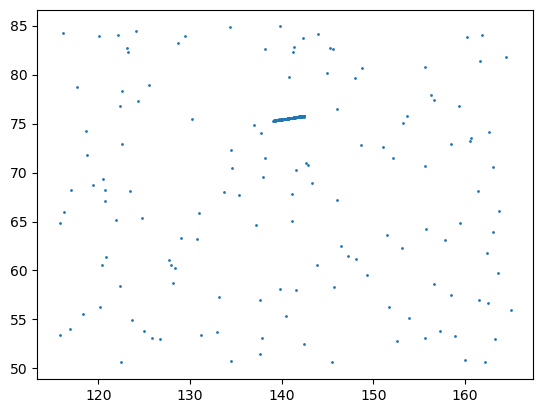

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(r'C:\Users\rogbg\Downloads\darkmatter.csv', skiprows = 1, delimiter=',')

cenra = 140.76398
cendec = 75.5344

radiff = (data[:,0] - cenra)*np.pi/180
decdiff = (data[:,1] - cendec)*np.pi/180

angsep = np.sqrt( (radiff*np.cos(cendec*np.pi/180))**2 + decdiff**2 )
good = np.where(angsep <= 0.01)

plt.scatter(data[:,0], data[:,1], s=1)
plt.show()

data = data[good]

Calculating relative RA/Dec difference of each star w.r.t. the galaxy's centre and converting all data to SI units

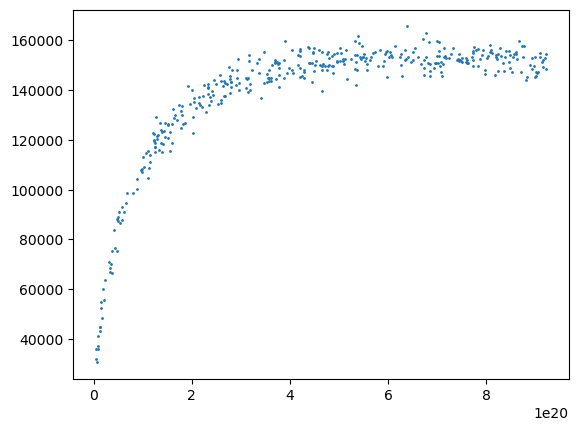

In [6]:
radiff = (data[:,0] - cenra)*np.pi/180
decdiff = (data[:,1] - cendec)*np.pi/180
ang_vel = data[:,2]/365/86400 /3600*np.pi/180/1000     #*3.083e19*3500
c = 3e8
z = data[:,3] + 1
vrad = -c*(1-z**2)/(1+z**2) - 70*1000*3.5
vang = ang_vel * 3.083e19 * 3500
angsep = np.sqrt( (radiff*np.cos(cendec*np.pi/180))**2 + decdiff**2 )
angdist = angsep*3500*3.083e19
v = np.sqrt(vang**2 + vrad**2)
r = angdist*np.sqrt(1 + (vang/vrad)**2)
plt.scatter(r,v, s=1)

Function Fit with numerical integration

r_s=array([3.08346292e+20])


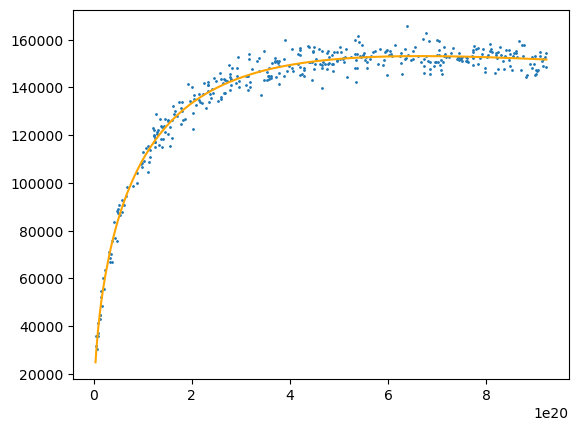

In [13]:
from scipy import integrate
import scipy.optimize

ri = rad = r
msun = 2*10**30
parsec = 3.0857*10**16
G = 6.67*10**-11
rho0 = 0.02 * msun/(parsec)**3

def vel(r_inp, r_s):
    return [np.sqrt(G/rb * 4*np.pi * integrate.quad(lambda x: x**2 * rho0/(x/r_s*(1+x/r_s)**2), 0, rb)[0]) for rb in r_inp]

r_s, cov = scipy.optimize.curve_fit(vel, ri, v,  p0 = [3.083e19])
print(f"{r_s=}")
y = vel(np.sort(rad), r_s[0])
plt.scatter(rad, v, s=1)
plt.plot(np.sort(rad), y, color = 'orange')
plt.show()

In [14]:
rho = 0.02 * 2e30 / 3.08e16**3 #solar masses per pc^3 to kg per m^3
G = 6.67e-11

def f(r, rs):
    return (np.sqrt( (4*np.pi*G*rho*rs**3* (np.log((rs+r)/rs) - r/(rs+r)))/r))

def dens(r):
    M = 4*np.pi*rho*rs**3* (np.log((rs+r)/rs) - r/(rs+r))
    return M/(4/3*np.pi*r**3)
rs = 3.074337091387232e+20
dens(rs*50)

9.697327934218052e-26

In [15]:
dens(rs*30)/8.5e-27

44.134953344531894

Using this virial radius, find the total mass contained inside the sphere i.e. the mass of dark matter in the galaxy

In [17]:
rvir = 30*rs
M = 4*np.pi*rho*rs**3* (np.log((rs+rvir)/rs) - rvir/(rs+rvir))
M

1.2328448502283812e+42